In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split

tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16347245853431973919, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3729397621096498695
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9588830866772256114
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5517836439586981206
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)        

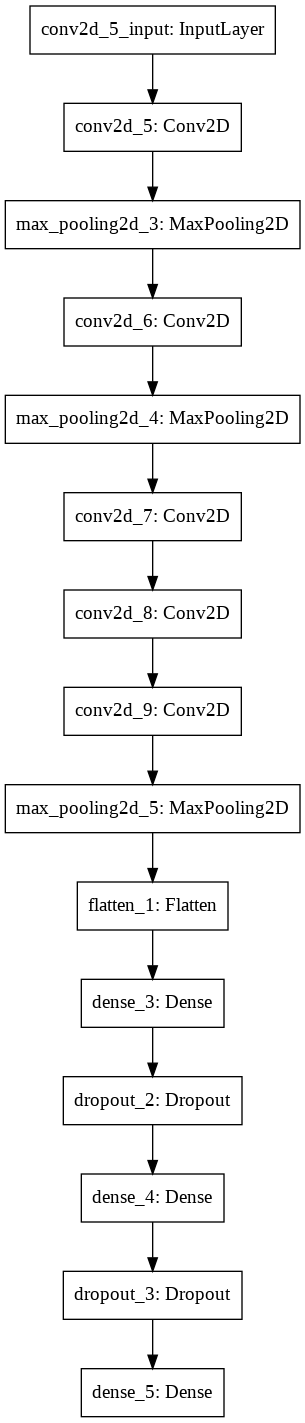

In [7]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = np_utils.to_categorical(y_train,1000)
y_test = np_utils.to_categorical(y_test,1000)

# Variables
batch_size = 64
num_classes = 10
epochs = 10


# my model
model = keras.Sequential()
model.add(keras.layers.Conv2D(96,  kernel_size=(11,11),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(256, kernel_size=(5,5),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(384, kernel_size=(3,3),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.Conv2D(384, kernel_size=(3,3),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=(3,3),strides=(1,1), activation='relu',input_shape=(32,32,3),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1000, activation='softmax'))

model.summary()
plot_model(model, to_file='model.png')


In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1000)
(10000, 32, 32, 3)
(10000, 1000)


In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

# Saving the model
save_dir = 'drive/My Drive/Colab Notebooks'
model_name = 'cifar10.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Evaluate
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test Accuracy',test_acc)

Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.3490 - accuracy: 0.1002 - val_loss: 2.3090 - val_accuracy: 0.1000
Epoch 2/10
1021/1563 [==================>...........] - ETA: 11s - loss: 2.3084 - accuracy: 0.1007

KeyboardInterrupt: ignored

In [ ]:
# Plotting the metrics
fig = plt.figure()
#plt.subplot(2,1,1)
plt.plot()
# plt.scatter(history.history['accuracy'],history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.show()

#plt.subplot(2,1,2)
plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('model_loss.png')
plt.show()

In [ ]:
# Predict
# 0 = Airplane, 1 = Automobile, 2 = Bird, 3 = Cat, 4 = Deer
# 5 = Dog, 6 = Frog, 7 = Horse, 8 = Ship, 9 = Truck
from random import randint

for i in range(10):  
    plt.subplot(2,5,i+1)
    plt.rcParams["figure.figsize"] = (20,9)
    index = randint(0,9999)
    plt.imshow(x_train[index])
    plt.xticks([])
    plt.yticks([])
    prediction = model.predict_classes(x_train[index].reshape(1,32,32,3))
    plt.title(prediction)
    plt.savefig('test_set.png')
plt.show()

